<a href="https://colab.research.google.com/github/Priyabrat845/Logistic-Regression/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction: What is Logistic Regression?**

* Logistic regression is a classification algorithm that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). 

* A logistic regression produces a logistic curve, which is limited to values between 0 and 1. 

* Logistic regression models the probability that each input belongs to a particular category.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Dataset initialization**

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Rough works/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 7043 Columns 21


In [5]:
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [6]:
df = data.copy()

In [8]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


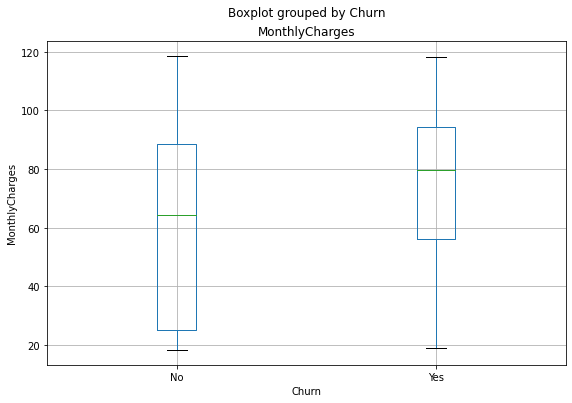

In [9]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


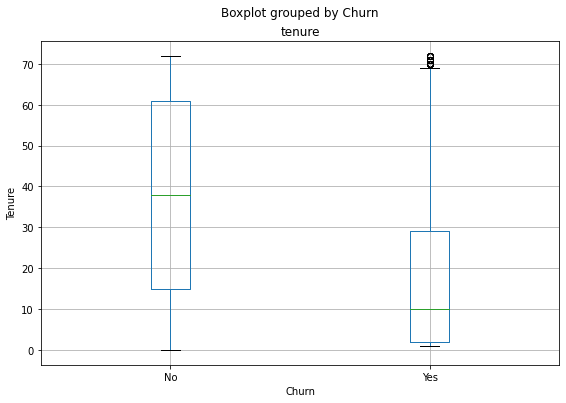

In [10]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

## **Insights from our simple EDA:**

In [15]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# features will be saved as X and our target will be saved as y
X = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

In [12]:
df.shape

(7043, 22)

## **Splitting data into train and test**



In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [18]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [19]:
y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

## **Fitting logistic regression on train data**

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#Getting the model coefficient
clf.coef_

array([[-0.05646728,  0.03315385]])

In [24]:
#Getting the model intercept
clf.intercept_

array([-1.77408975])

## **Evaluating the performance of the trained model**

In [25]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [26]:
X_test

,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25


In [27]:
test_preds

array([[0.7145149 , 0.2854851 ],
       [0.78522641, 0.21477359],
       [0.53064776, 0.46935224],
       ...,
       [0.77288679, 0.22711321],
       [0.71618111, 0.28381889],
       [0.57740038, 0.42259962]])

In [28]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [29]:
test_preds

array([0.2854851 , 0.21477359, 0.46935224, ..., 0.22711321, 0.28381889,
       0.42259962])

In [30]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [31]:
train_class_preds

array([0, 0, 0, ..., 0, 1, 0])

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [33]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7857649982250621
The accuracy on test data is  0.7735982966643009


## **Confusion matrix for logistic regression**

[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

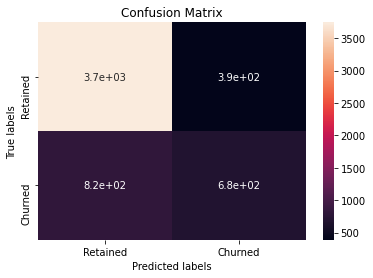

In [34]:
# Get the confusion matrix for training datsets

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [35]:
cm[1,1]

682

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4133
           1       0.64      0.45      0.53      1501

    accuracy                           0.79      5634
   macro avg       0.73      0.68      0.70      5634
weighted avg       0.77      0.79      0.77      5634



[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

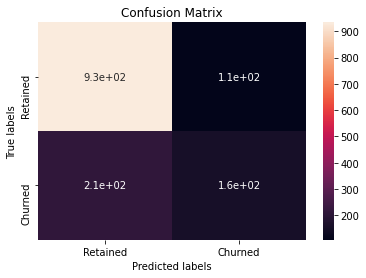

In [38]:
# Get the confusion matrix for the testing dataset

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [39]:
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1041
           1       0.59      0.42      0.49       368

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409

